<h1 align="center"> Principle Component Analysis (PCA) for Data Visualization </h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

## Load Iris Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [3]:
pd.read_csv(url).head(2)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc


In [4]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=[
                     'preco_compra'
                     ,'preco_manutencao'
                     ,'num_portas'
                     ,'num_pessoas'
                     ,'tamanho_mala'
                     ,'seguranca'
                     ,'target'])

In [5]:
df.head()

,preco_compra,preco_manutencao,num_portas,num_pessoas,tamanho_mala,seguranca,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df['preco_compra'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [7]:
# Converter para Inteiros

preco_compra_dict = {
    "vhigh" : '4'
    , "high" : '3'
    , "med" : '2'
    , "low" : '1'}

preco_manutencao_dict = {
    "vhigh" : '4'
    , "high" : '3'
    , "med" : '2'
    , "low" : '1'}

num_portas_dict = {
    "5more" : '5'
}

num_pessoas_dict = {
    "more" : '5'
}
tamanho_mala_dict = {
    "small" : '1'
    ,"med" : '2'
    ,"big" : '3'
}

seguranca_dict = {
    "low" : '1'
    ,"med" : '2'
    ,"high" : '3'
}

df['preco_compra'] = df['preco_compra'].replace(preco_compra_dict, regex=True)
df['preco_manutencao'] = df['preco_manutencao'].replace(preco_manutencao_dict, regex=True)
df['num_portas'] = df['num_portas'].replace(num_portas_dict, regex=True)
df['num_pessoas'] = df['num_pessoas'].replace(num_pessoas_dict, regex=True)
df['tamanho_mala'] = df['tamanho_mala'].replace(tamanho_mala_dict, regex=True)
df['seguranca'] = df['seguranca'].replace(seguranca_dict, regex=True)

## Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [8]:
features = ['preco_compra'
                     ,'preco_manutencao'
                     ,'num_portas'
                     ,'num_pessoas'
                     ,'tamanho_mala'
                     ,'seguranca']
                     
x = df.loc[:, features].values

In [9]:
y = df.loc[:,['target']].values

In [57]:
X = StandardScaler().fit_transform(x)

In [49]:
X = x

In [48]:
pd.DataFrame(data = x, columns = features).head()

,preco_compra,preco_manutencao,num_portas,num_pessoas,tamanho_mala,seguranca
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2


## PCA Projection to 2D

In [50]:
pca = PCA(n_components=2)

In [58]:
principalComponents = pca.fit_transform(X)

In [59]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [60]:
principalDf.head(5)

,principal component 1,principal component 2
0,1.341641,1.191214
1,1.341641,1.191214
2,1.341641,1.191214
3,1.341641,-0.000865
4,1.341641,-0.000865


In [61]:
df[['target']].head()

,target
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [62]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,1.341641,1.191214,unacc
1,1.341641,1.191214,unacc
2,1.341641,1.191214,unacc
3,1.341641,-0.000865,unacc
4,1.341641,-0.000865,unacc


In [63]:
finalDf[finalDf['target'] == 'v-good']

,principal component 1,principal component 2,target


In [64]:
X = [finalDf['principal component 1'], finalDf['principal component 1']]

In [65]:
X = zip(list(finalDf['principal component 1']), list(finalDf['principal component 2']))

In [66]:
a = list(finalDf['principal component 1'])
b = list(finalDf['principal component 2'])
c = np.array(map(lambda x,y:np.array([x,y]),a,b))

X=np.array([(a[i],b[i]) for i in range(0,len(a))])


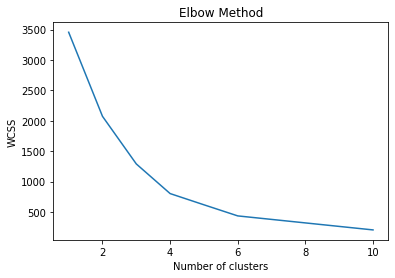

In [67]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

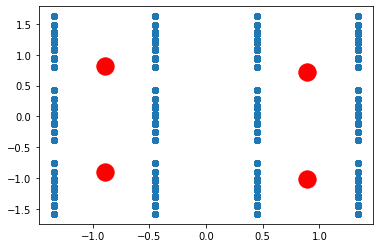

In [68]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()